<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-2-Build/blob/master/Mountain_Scott_MergedTables_BuildWeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

------------------

###Schema diagram for csv files

In [0]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


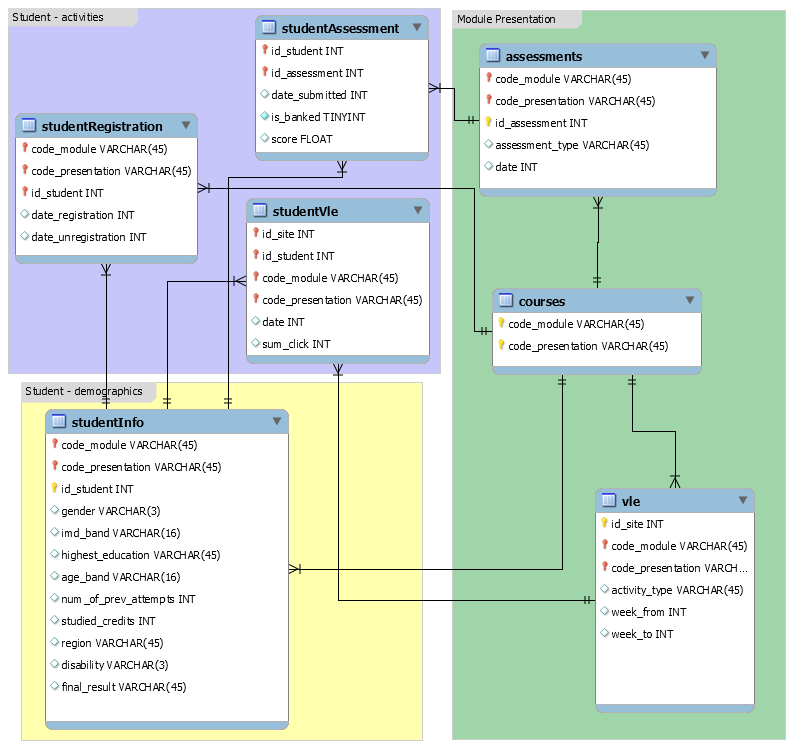

In [0]:
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/Datasets/Images/schema_diagram.png'))

In [0]:
#https://analyse.kmi.open.ac.uk/open_dataset#description

<h3>My chosen dataset has different csv files that describe different aspects of the student and their interacations with the LMS.  The LMS is referred to as a VLE (virtual learning envrionment)in the dataset</h3>

A chief goal of learning analytics is to assess academic performance, so there <b>two</b> variables that would be of interest:  

1. "final_result": a categorical variable in the StudentInfo csv and
2. "score" a continuous variable in the studentAssessment csv

I've decided to choose "final_result" as my target variable because, as the name implies, it represents values that account for students overall performance in an academic period.  The "score" variable, on the other hand, only has values that represent performance on different assessments within an academic period.  Because different assessments have different weights, interpreting the meaning of scores with reference to other data would be more complicated. 


Personal Notes: 
B - February
J - October

The imd_band variable relates to the Index of Multiple deprevation, which is the UK government's way of measuring <a href = "https://www.arcgis.com/apps/Cascade/index.html?appid=3c16c360b5704192a550f844b13ffb0a"> how deprived different neighborhoods are</a>, compared to one another. More info <a href = " https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/579151/English_Indices_of_Deprivation_2015_-_Frequently_Asked_Questions_Dec_2016.pdf"> here</a>. 

"[*excerpt*] This map groups neighbourhoods according to whether they are among the
most deprived: 1 per cent; 2 per cent; 3-5 per cent; 5 to 10 per cent; 10 to 20
per cent; and 20 to 30 per cent nationally"

In [0]:
import pandas as pd
import numpy as np

In [0]:
!pip install category_encoders==2.*

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report
import xgboost as xgb
#!pip install category_encoders==2.*
#OneHotEncoder(use_cat_names=True)


In [0]:
pd.read_csv('/content/drive/My Drive/Datasets/Build_2/studentInfo.csv')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [0]:
grades = pd.read_csv('/content/drive/My Drive/Datasets/Build_2/studentInfo.csv')


In [0]:
num_clicks = pd.read_csv('/content/drive/My Drive/Datasets/Build_2/studentVle.csv')

In [0]:
num_clicks.head(30)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0
5,AAA,2013J,28400.0,546652.0,-10.0,8.0
6,AAA,2013J,28400.0,546876.0,-10.0,2.0
7,AAA,2013J,28400.0,546688.0,-10.0,15.0
8,AAA,2013J,28400.0,546662.0,-10.0,17.0
9,AAA,2013J,28400.0,546890.0,-10.0,1.0


###Some IDs from "id_student" have multiple entries. I think a groupby statement will help to sum them all together per observation.  <br/> <b>Note:</b> there are less unique IDs in StudentVLE.csv than there are in StudentInfo.csv, so a left_join on StudentInfo (assigned to the dataframe "grades") will leave IDs with NaN values for joins that don't have shared columns.  Additionally, StudentVLE.csv ("num_clicks") only contains data from two modules: AAA and BBB whereas "grades" has seven modules: 'AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'. 



In [0]:
num_clicks = num_clicks.groupby(["id_student", "code_module", "code_presentation"] ).agg({'date':'sum', 'sum_click':'sum'}).reset_index()



In [0]:
grades.columns, num_clicks.columns

(Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
        'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
        'studied_credits', 'disability', 'final_result'],
       dtype='object'),
 Index(['id_student', 'code_module', 'code_presentation', 'date', 'sum_click'], dtype='object'))

In [0]:
num_clicks.id_student.nunique(), grades.id_student.nunique()   #same students in both datasets

(7183, 28785)

In [0]:
grades.shape, num_clicks.shape

((32593, 12), (7354, 5))

In [0]:
grades = grades.merge(num_clicks, how="left", on=["id_student", "code_module", "code_presentation"])

In [0]:
grades.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32593 entries, 0 to 32592
Data columns (total 14 columns):
code_module             32593 non-null object
code_presentation       32593 non-null object
id_student              32593 non-null int64
gender                  32593 non-null object
region                  32593 non-null object
highest_education       32593 non-null object
imd_band                31482 non-null object
age_band                32593 non-null object
num_of_prev_attempts    32593 non-null int64
studied_credits         32593 non-null int64
disability              32593 non-null object
final_result            32593 non-null object
date                    7354 non-null float64
sum_click               7354 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.7+ MB


In [0]:
grades = grades.dropna(axis=0) #, subset=['imd_band','age_band']).fillna(0)

In [0]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7276 entries, 0 to 8655
Data columns (total 14 columns):
code_module             7276 non-null object
code_presentation       7276 non-null object
id_student              7276 non-null int64
gender                  7276 non-null object
region                  7276 non-null object
highest_education       7276 non-null object
imd_band                7276 non-null object
age_band                7276 non-null object
num_of_prev_attempts    7276 non-null int64
studied_credits         7276 non-null int64
disability              7276 non-null object
final_result            7276 non-null object
date                    7276 non-null float64
sum_click               7276 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 852.7+ KB


In [0]:
grades.tail(100)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
8540,BBB,2014J,2187308,F,North Western Region,HE Qualification,0-10%,0-35,0,120,N,Pass,7093.0,684.0
8541,BBB,2014J,2192113,M,Scotland,HE Qualification,40-50%,35-55,1,60,Y,Withdrawn,996.0,146.0
8542,BBB,2014J,2207474,F,South West Region,Lower Than A Level,50-60%,35-55,0,60,N,Pass,7605.0,514.0
8543,BBB,2014J,2213814,F,South West Region,Lower Than A Level,0-10%,35-55,0,60,Y,Withdrawn,1173.0,88.0
8544,BBB,2014J,2216682,M,Ireland,A Level or Equivalent,90-100%,0-35,0,60,N,Pass,2784.0,131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,BBB,2014J,2688945,F,South Region,HE Qualification,40-50%,35-55,0,60,N,Pass,4791.0,217.0
8652,BBB,2014J,2692969,F,Scotland,HE Qualification,80-90%,35-55,0,75,N,Pass,13491.0,1030.0
8653,BBB,2014J,2694919,F,East Anglian Region,Lower Than A Level,60-70%,35-55,0,120,Y,Pass,2939.0,223.0
8654,BBB,2014J,2698577,F,Wales,Lower Than A Level,50-60%,35-55,0,60,N,Fail,4204.0,364.0


In [0]:
#check each column for data entry errors

In [0]:
def data_entry_check(df):
  """function for checking for data engry errors in 
  categorical values in all columns of a dataframe
  by placcing all unique values in a list of arrays that
  can be scanned over quickly"""
  a = []
  for col in df:
    if df[col].dtype.name not in ['int64', 'float64'] :
      a.append(df[col].unique())
  return a


In [0]:
data_entry_check(grades)

[array(['AAA', 'BBB'], dtype=object),
 array(['2013J', '2014J', '2013B', '2014B'], dtype=object),
 array(['M', 'F'], dtype=object),
 array(['East Anglian Region', 'Scotland', 'North Western Region',
        'South East Region', 'West Midlands Region', 'Wales',
        'South Region', 'South West Region', 'East Midlands Region',
        'Yorkshire Region', 'London Region', 'North Region', 'Ireland'],
       dtype=object),
 array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
        'Post Graduate Qualification', 'No Formal quals'], dtype=object),
 array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
        '60-70%', '40-50%', '10-20', '0-10%'], dtype=object),
 array(['55<=', '35-55', '0-35'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)]

In [0]:
#grades.code_module_x.tolist().index("FFF")

grades.code_module.unique()

array(['AAA', 'BBB'], dtype=object)

###There don't appear to be any major issues with data entry. Some minor notes:
 - The percent sign is missing from one category of imd_band
 - '55<=' in 'age_band' is ambiguous.  I think prob should be >=55.  Also the borders of the age ranges are not clearly defined.  For example, a person who is 35 years old could belong to either the '0-35' or the '35-55' categories without better clarity.  Still I think this overlap minor given the size of each age range. 

In [0]:
grades.final_result.value_counts(normalize=True)  #baselines for prediction

Pass           0.483095
Fail           0.232820
Withdrawn      0.186778
Distinction    0.097306
Name: final_result, dtype: float64

In [0]:
#drop high-cardinality column for final run but need "id_student" to merge datasets
#grades = grades.drop("id_student", axis=1)


In [0]:
pre_split = grades.sample(frac=1, random_state=99)  
#shuffle rows in case there's unintentional bias in how they are ordered


In [0]:
train_row_size = round(len(pre_split)*.75)
test_row_size = len(pre_split) - train_row_size

#row size for a 

In [0]:
train_pre_split = pre_split.head(train_row_size)
validate = pre_split.tail(test_row_size)

In [0]:
grades.shape[0] == pre_split.shape[0] == (train_pre_split.shape[0] + validate.shape[0])
#confirmation that no rows have been dropped in the process

True

In [0]:
y_pre_split = train_pre_split.final_result
X_pre_split = train_pre_split.drop(y_pre_split.name, axis=1)

y_validate = validate.final_result
X_validate = validate.drop(y_validate.name, axis=1)

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X_pre_split, y_pre_split, test_size=.2, random_state=99)

In [0]:
pipeline = make_pipeline(OrdinalEncoder(), RandomForestClassifier())

In [0]:
pipeline.fit(X_pre_split, y_pre_split)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['code_module', 'code_presentation',
                                      'gender', 'region', 'highest_education',
                                      'imd_band', 'age_band', 'disability'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'code_module',
                                          'data_type': dtype('O'),
                                          'mapping': BBB    1
AAA    2
NaN   -2
dtype: int64},
                                         {'col': 'code_presen...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, ma

In [0]:
#y_pred = pipeline.predict(X_test)

encoder = OrdinalEncoder()
encoded_Xval = encoder.fit_transform(X_validate)

# encoder2 = OrdinalEncoder()
# encoded_combinedX = encoder2.fit_transform(X_pre_split)

In [0]:
# pipeline.score(X_test, y_test)

In [0]:
pipeline.score(X_validate, y_validate)

0.6085761407366685

In [0]:
0.5898845519516218-0.483095

0.10678955195162182

Using RandomForestClassifier, the model performs 10.6% better than the baseline prediction (0.56642-0.48309)

In [0]:
#forced error 

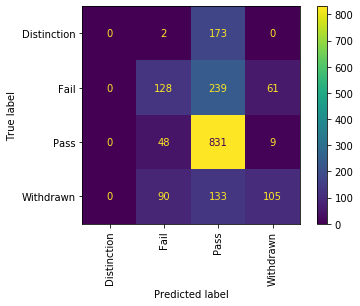

In [0]:


plot_confusion_matrix(pipeline, encoded_Xval, y_validate, values_format='.0f', xticks_rotation='vertical');

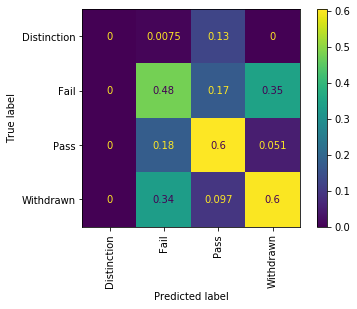

In [0]:
plot_confusion_matrix(pipeline, encoded_Xval, y_validate,  xticks_rotation='vertical', normalize='pred');

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
scores = pipeline.predict_proba(encoded_Xval)

In [0]:
roc_auc_score(y_validate, scores, multi_class='ovr', average='macro')

0.7358095312741222

In [0]:
roc_auc_score(y_validate, scores, multi_class='ovr', average='weighted')

0.7391802542378126

In [0]:
from sklearn.preprocessing import label_binarize

In [0]:
from sklearn.metrics import roc_curve, auc

In [0]:
y_binarized = label_binarize(y_validate, classes=['Pass', 'Withdrawn', 'Fail', 'Distinction'])

In [0]:
n_classes = y_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_binarized.ravel(), scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

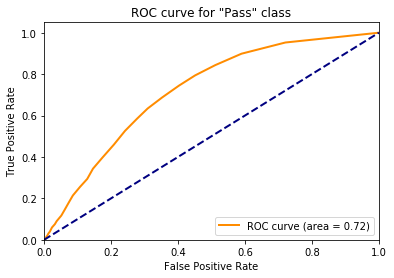

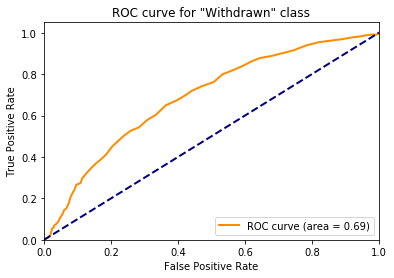

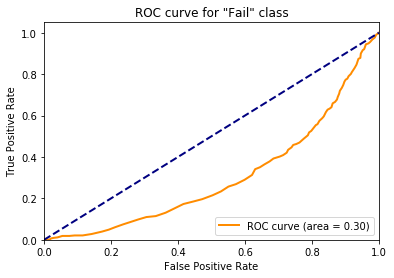

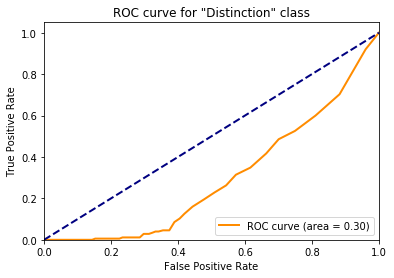

In [0]:
#plot_num = 221
for i in range(4):  #plot the ROC curve for all four classes
  title_labels = ['Pass', 'Withdrawn', 'Fail', 'Distinction']
  plt.figure()
  lw = 2

  #plt.subplot(plot_num)
  plt.plot(fpr[i], tpr[i], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve for "'+title_labels[i]+ '" class')
  plt.legend(loc="lower right")
  #plot_num+=1
  plt.show()

  

In [0]:
ord_encoder = OrdinalEncoder()

In [0]:
encoded_X_train = ord_encoder.fit_transform(X_pre_split)
# encoded_X_test = ord_encoder.fit_transform(X_test)

In [0]:
model = xgb.XGBClassifier(
    n_estimators=1000, 
    max_depth=7,       
    learning_rate=0.5, 
    n_jobs=-1
)

eval_set = [(encoded_X_train, y_pre_split), 
            (encoded_Xval, y_validate)]

model.fit(encoded_X_train, y_pre_split, 
          eval_set=eval_set, 
          eval_metric='mlogloss',  #metric for multi-class labels
          early_stopping_rounds=50) 

[0]	validation_0-mlogloss:1.05395	validation_1-mlogloss:1.11804
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:0.897809	validation_1-mlogloss:1.02233
[2]	validation_0-mlogloss:0.799141	validation_1-mlogloss:0.975617
[3]	validation_0-mlogloss:0.735734	validation_1-mlogloss:0.952629
[4]	validation_0-mlogloss:0.686544	validation_1-mlogloss:0.941664
[5]	validation_0-mlogloss:0.647008	validation_1-mlogloss:0.936123
[6]	validation_0-mlogloss:0.617157	validation_1-mlogloss:0.934714
[7]	validation_0-mlogloss:0.587917	validation_1-mlogloss:0.939205
[8]	validation_0-mlogloss:0.568606	validation_1-mlogloss:0.939875
[9]	validation_0-mlogloss:0.553719	validation_1-mlogloss:0.939265
[10]	validation_0-mlogloss:0.537489	validation_1-mlogloss:0.940077
[11]	validation_0-mlogloss:0.526995	validation_1-mlogloss:0.94188
[12]	validation_0-mlogloss:0.513064	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
model.score(encoded_Xval, y_validate)

0.6151731720725674

In [0]:
0.6151731720725674-0.48309

0.13208317207256737

Using XGBClassifier, the model performs 13.2% better than the baseline prediction (0.61517-0.48309)





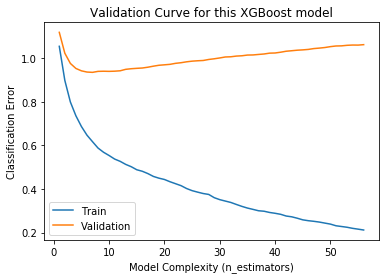

In [0]:
results = model.evals_result()
train_error = results['validation_0']['mlogloss']
val_error = results['validation_1']['mlogloss']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
#plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();

In [0]:
min_error = np.array(results['validation_1']['mlogloss']).min()

In [0]:
results['validation_1']['mlogloss'].index(min_error)

6

###Based on the chart and list of "mlogloss" errors, the model begins to lose predictive value after about 6 estimators.  This suggests that the unrefined version of my dataset (that is, the dataset without feature engineering) should have the following parameter:

```
n_estimators=6
```



###Todo:

- [ ] Discuss how my model's predictions compare with the baseline of the majority class
- [ ] Interpret the ROC curve and its implications for each class prediction
- [ ] Speculate on how to improve model predictions such as by:
  - Combining "distinction" with "pass" 
  - dropping Withdrawn (withdrawing from a class may be a poor indicator of whether a student was a high or low performer and thus may not fit well with other class predictions
  - merging other csv files to so that more features are added.
  - dropping the high-cardinality column ("id_student") 



In [0]:
no_withdrawn_temp = grades.query("final_result != 'Withdrawn'")  

#remove withdrawn rows from unshuffled dataset 

# train_pre_split = pre_split.head(train_row_size)
# validate = pre_split.tail(test_row_size)
# y_pre_split = train_pre_split.final_result
# X_pre_split = train_pre_split.drop(y_pre_split.name, axis=1)

# y_validate = validate.final_result
# X_validate = validate.drop(y_validate.name, axis=1)

In [0]:
temp_train = train_pre_split.query("final_result != 'Withdrawn'")
#original shuffled train dataframe with "withdrawn" rows removed
temp_validate = validate.query("final_result != 'Withdrawn'")
#original shuffled train dataframe with "withdrawn" rows removed


In [0]:
temp_train.append(temp_validate)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
7350,BBB,2014J,645371,F,East Anglian Region,Lower Than A Level,50-60%,0-35,0,60,N,Fail,464.0,61.0
3633,BBB,2013J,577069,F,London Region,HE Qualification,10-20,0-35,0,60,N,Distinction,51312.0,1380.0
7206,BBB,2014J,630697,F,East Anglian Region,A Level or Equivalent,20-30%,0-35,0,60,N,Pass,651.0,78.0
6276,BBB,2014B,2271743,F,Wales,A Level or Equivalent,0-10%,0-35,2,180,Y,Fail,2800.0,206.0
530,AAA,2014J,348807,M,East Midlands Region,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,12628.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,BBB,2014B,633865,F,Yorkshire Region,HE Qualification,10-20,0-35,0,60,N,Fail,193.0,66.0
1941,BBB,2013B,548744,M,West Midlands Region,A Level or Equivalent,30-40%,0-35,0,60,N,Pass,19448.0,481.0
3743,BBB,2013J,582446,F,Yorkshire Region,HE Qualification,30-40%,35-55,0,60,N,Pass,36243.0,990.0
8575,BBB,2014J,2353764,F,West Midlands Region,Lower Than A Level,30-40%,35-55,0,120,N,Pass,6372.0,642.0


In [0]:
no_withdrawn_temp.shape, temp_train.append(temp_validate).shape

((5917, 14), (5917, 14))

In [0]:
no_withdrawn = temp_train.append(temp_validate)

In [0]:
no_withdrawn.final_result.value_counts(normalize=True) #new baselines

Pass           0.594051
Fail           0.286294
Distinction    0.119655
Name: final_result, dtype: float64

In [0]:
ynw_train = temp_train.final_result
Xnw_train = temp_train.drop(ynw_train.name, axis=1)

ynw_test = temp_validate.final_result
Xnw_test = temp_validate.drop(ynw_train.name, axis=1)

In [0]:
# Xnw_train, Xnw_test, ynw_train, ynw_test = train_test_split(X_nw, y_nw, random_state=99, test_size=.2)

In [0]:
pipeline2 = make_pipeline(OrdinalEncoder(), RandomForestClassifier())

In [0]:
pipeline2.fit(Xnw_train, ynw_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['code_module', 'code_presentation',
                                      'gender', 'region', 'highest_education',
                                      'imd_band', 'age_band', 'disability'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'code_module',
                                          'data_type': dtype('O'),
                                          'mapping': BBB    1
AAA    2
NaN   -2
dtype: int64},
                                         {'col': 'code_presen...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, ma

In [0]:
pipeline2.score(Xnw_test, ynw_test)

0.7142857142857143

In [0]:
0.7142857142857143 - .594051

0.1202347142857143

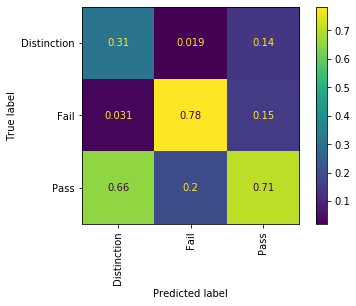

In [0]:
plot_confusion_matrix(pipeline2, Xnw_test, ynw_test,  xticks_rotation='vertical', normalize='pred');

With the "Withdrawn" class dropped, the RFC model performs 12% better than the baseline prediction (0.717639 - 0.594051)

In [0]:
#forced error

In [0]:
temp_train.final_result = temp_train.final_result.replace("Distinction", "Pass")
#original shuffled train dataframe with "withdrawn" rows removed
temp_validate.final_result = temp_validate.final_result.replace("Distinction", "Pass")
#original shuffled train dataframe with "withdrawn" rows removed

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
temp_train.append(temp_validate).final_result.value_counts(normalize=True) #new baselines

Pass    0.713706
Fail    0.286294
Name: final_result, dtype: float64

In [0]:
#"pf" means "pass-fail because there are only two categories now"
ypf_train = temp_train.final_result   
Xpf_train = temp_train.drop(ynw_train.name, axis=1)

ypf_test = temp_validate.final_result
Xpf_test = temp_validate.drop(ynw_train.name, axis=1)

In [0]:
# pass_fail = no_withdrawn
# #combine the "Distinction" and "Pass" Categories
# pass_fail.final_result.value_counts(normalize=True)  #new baselines

In [0]:
# y_pf = pass_fail.final_result
# X_pf = pass_fail.drop(y_pf.name, axis=1)

In [0]:
# Xpf_train, Xpf_test, ypf_train, ypf_test = train_test_split(X_pf, y_pf, random_state=99, test_size=.25)

In [0]:
pipeline3 = make_pipeline(OrdinalEncoder(), RandomForestClassifier())
pipeline3.fit(Xpf_train, ypf_train)
pipeline3.score(Xpf_test, ypf_test)

0.8403755868544601

In [0]:
0.8490945674044266 - 0.713706

0.13538856740442662

With the "Distinction" merged with "Pass", the model performs <b>13.5% better</b> than the baseline prediction (0.849094 - 0.713706)


---



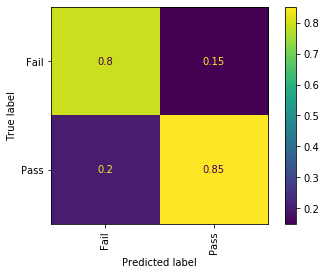

In [0]:
plot_confusion_matrix(pipeline3, Xpf_test, ypf_test,  xticks_rotation='vertical', normalize='pred');

In [0]:
encoder_roc = OrdinalEncoder()
encoded_Xpf_test = encoder_roc.fit_transform(Xpf_test)

In [0]:
Xpf_test.shape, ypf_test.shape

((1491, 13), (1491,))

In [0]:
plt.rcParams['figure.dpi'] = 72

In [0]:
!pip install pdpbox
!pip install shap

     |████████████████████████████████| 57.7MB 54kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=8c5276a77ab9c516804d78f68047c0488d807e073f1206912e948b94630b0db8
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 276kB 4.5MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394156 sha256=dc6d2a75aab9ad5c0a1819e6a645bc9be160a90e81a548ab828b1bc662b8d896
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:

encoder_pdp = OrdinalEncoder()
Xpf_encoded = encoder_pdp.fit_transform(Xpf_train)

model_pdp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_pdp.fit(Xpf_encoded, ypf_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


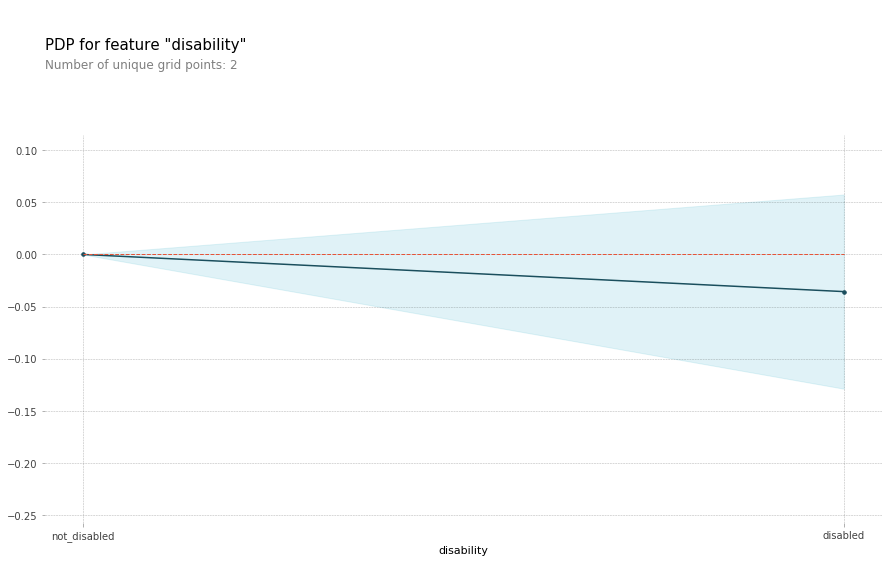

In [0]:


from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'disability'

isolated = pdp_isolate(
    model=model_pdp, 
    dataset=Xpf_encoded, 
    model_features=Xpf_encoded.columns, 
    feature=feature
)
pdp_plot(isolated, feature)
plt.xticks([1, 2], ['not_disabled', 'disabled']);
# # Use Pdpbox
# %matplotlib inline
# import matplotlib.pyplot as plt
# from pdpbox import pdp
# feature = 'sex'
# pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
# pdp.pdp_plot(pdp_dist, feature);

In [0]:
encoder_pdp.mapping

[{'col': 'code_module', 'data_type': dtype('O'), 'mapping': BBB    1
  AAA    2
  NaN   -2
  dtype: int64},
 {'col': 'code_presentation', 'data_type': dtype('O'), 'mapping': 2014J    1
  2013J    2
  2014B    3
  2013B    4
  NaN     -2
  dtype: int64},
 {'col': 'gender', 'data_type': dtype('O'), 'mapping': F      1
  M      2
  NaN   -2
  dtype: int64},
 {'col': 'region',
  'data_type': dtype('O'),
  'mapping': East Anglian Region      1
  London Region            2
  Wales                    3
  East Midlands Region     4
  North Region             5
  South East Region        6
  North Western Region     7
  South West Region        8
  Yorkshire Region         9
  West Midlands Region    10
  Scotland                11
  South Region            12
  Ireland                 13
  NaN                     -2
  dtype: int64},
 {'col': 'highest_education',
  'data_type': dtype('O'),
  'mapping': Lower Than A Level             1
  HE Qualification               2
  A Level or Equivalent  

In [0]:
encoder_shap = OrdinalEncoder()
encoded_Xpf_train = encoder_shap.fit_transform(Xpf_train)
encoded_Xpf_test  = encoder_shap.fit_transform(Xpf_test)

In [0]:
from scipy.stats import randint, uniform


param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestClassifier(random_state=99), 
    param_distributions=param_distributions, 
    n_iter=8, 
    cv=2, 
    scoring='roc_auc', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=99
)

search.fit(encoded_Xpf_train, ypf_train);

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:    7.8s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    8.7s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    8.9s finished


In [0]:
#sorted(sklearn.metrics.SCORERS.keys())
print('Best hyperparameters', search.best_params_)
print('Cross-validation AUC-ROC', search.best_score_)
best_est = search.best_estimator_

Best hyperparameters {'max_depth': 10, 'max_features': 0.7225396744018673, 'n_estimators': 218}
Cross-validation AUC-ROC 0.8693807866898634


In [0]:
best_est.score(encoded_Xpf_test, ypf_test)

0.8531187122736419

In [0]:
0.8531187122736419 - 0.713706

With the "Distinction" merged with "Pass" and by using , the model performs <b>13.9% better</b> than the baseline prediction (0.853118 - 0.713706)

In [0]:
row = encoded_Xpf_test.iloc[[4]]
row

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
548,2,1,383600,2,11,3,8,1,0,60,1,24072.0,725.0


In [0]:
best_est.predict(row)

array(['Pass'], dtype=object)

In [0]:
import shap

explainer = shap.TreeExplainer(best_est)
shap_values = explainer.shap_values(row)



In [0]:
shap_values

[array([[ 0.03499904, -0.03605436,  0.00546095,  0.00614855, -0.00450681,
         -0.04063674,  0.00443682, -0.00031176, -0.00585002, -0.00374263,
         -0.00152483, -0.16461871, -0.02897436]]),
 array([[-0.03499904,  0.03605436, -0.00546095, -0.00614855,  0.00450681,
          0.04063674, -0.00443682,  0.00031176,  0.00585002,  0.00374263,
          0.00152483,  0.16461871,  0.02897436]])]

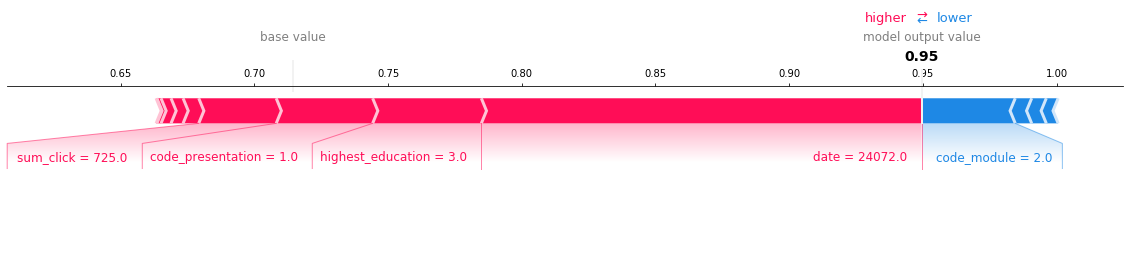

In [0]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1], 
    shap_values=shap_values[1], 
    features=row, 
    show=False,
    matplotlib=True
).savefig('first_shap_plot.png')


In [0]:
best_est.predict(encoded_Xpf_test).tolist().index('Fail')

3

In [0]:
row = encoded_Xpf_test.iloc[[3]]
row

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
4830,1,3,242390,1,2,1,2,1,1,60,1,2215.0,137.0


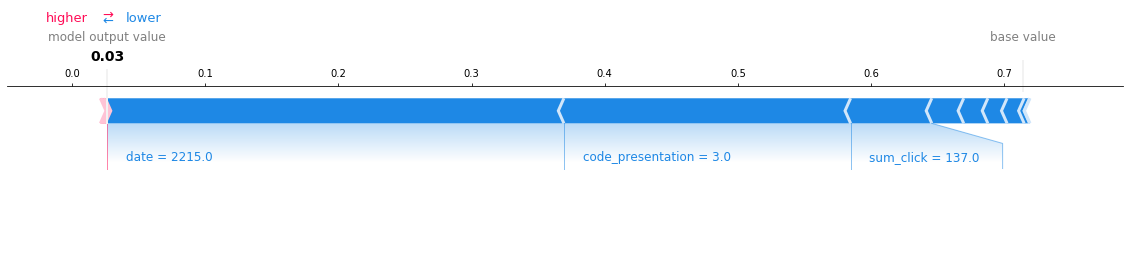

In [0]:
shap_values = explainer.shap_values(row)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1], 
    shap_values=shap_values[1], 
    features=row, 
    show=False,
    matplotlib=True
).savefig('first_shap_plot.png')

In [0]:
pass_fail = temp_train.append(temp_validate).reset_index(drop=True)

In [0]:
# pass_fail.to_csv("open_learning_analytics_kaggle.csv",index=False)

# pd.read_csv('open_learning_analytics_kaggle.csv')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
0,BBB,2014J,645371,F,East Anglian Region,Lower Than A Level,50-60%,0-35,0,60,N,Fail,464.0,61.0
1,BBB,2013J,577069,F,London Region,HE Qualification,10-20,0-35,0,60,N,Pass,51312.0,1380.0
2,BBB,2014J,630697,F,East Anglian Region,A Level or Equivalent,20-30%,0-35,0,60,N,Pass,651.0,78.0
3,BBB,2014B,2271743,F,Wales,A Level or Equivalent,0-10%,0-35,2,180,Y,Fail,2800.0,206.0
4,AAA,2014J,348807,M,East Midlands Region,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,12628.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,BBB,2014B,633865,F,Yorkshire Region,HE Qualification,10-20,0-35,0,60,N,Fail,193.0,66.0
5913,BBB,2013B,548744,M,West Midlands Region,A Level or Equivalent,30-40%,0-35,0,60,N,Pass,19448.0,481.0
5914,BBB,2013J,582446,F,Yorkshire Region,HE Qualification,30-40%,35-55,0,60,N,Pass,36243.0,990.0
5915,BBB,2014J,2353764,F,West Midlands Region,Lower Than A Level,30-40%,35-55,0,120,N,Pass,6372.0,642.0


<h2>References</h2>

<p>Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).</p>

<p>----References for determining an Evaluation metric for multi-class classfication and/or learning analytics/educational data mining--------</p>
<p>Umer r.umer@massey.ac.nz, R., Susnjak, T., Mathrani, A., & Suriadi, S. (2017). On predicting academic performance with process mining in learning analytics. Journal of Research in Innovative Teaching, 10(2), 160–176. Retrieved from http://10.0.4.84/JRIT-09-2017-0022 </p>

<p>Sokolova, M., & Lapalme, G. (2009). A systematic analysis of performance measures for classification tasks. Information Processing and Management, 45(4), 427–437. https://doi.org/10.1016/j.ipm.2009.03.002</p>

<p>Lu, O. H. T., Huang, A. Y. Q., Huang, J. C. H., Lin, A. J. Q., Ogata, H., & Yang, S. J. H. (2018). Applying learning analytics for the early prediction of students’ academic performance in blended learning. Educational Technology and Society, 21(2), 220–232.</p>